# Statistical Analisys

Data exploratory analysis 

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import iqr, norm
np.random.seed(432)

## Basic Statistical Analisys

In [2]:
inf1 = pd.read_csv('data/inflation.csv', delimiter=';')
inf1.index = pd.to_datetime(inf1.date, format='%d/%m/%Y')
inf1 = inf1.drop("date", axis = 1)
inf1['v_cpi'] = inf1['CPI'].pct_change(12)*100
inf1['vol_cpi1'] = inf1['CPI'].rolling(12).std()
# inf1.dropna(inplace=True)
# inf1.tail()

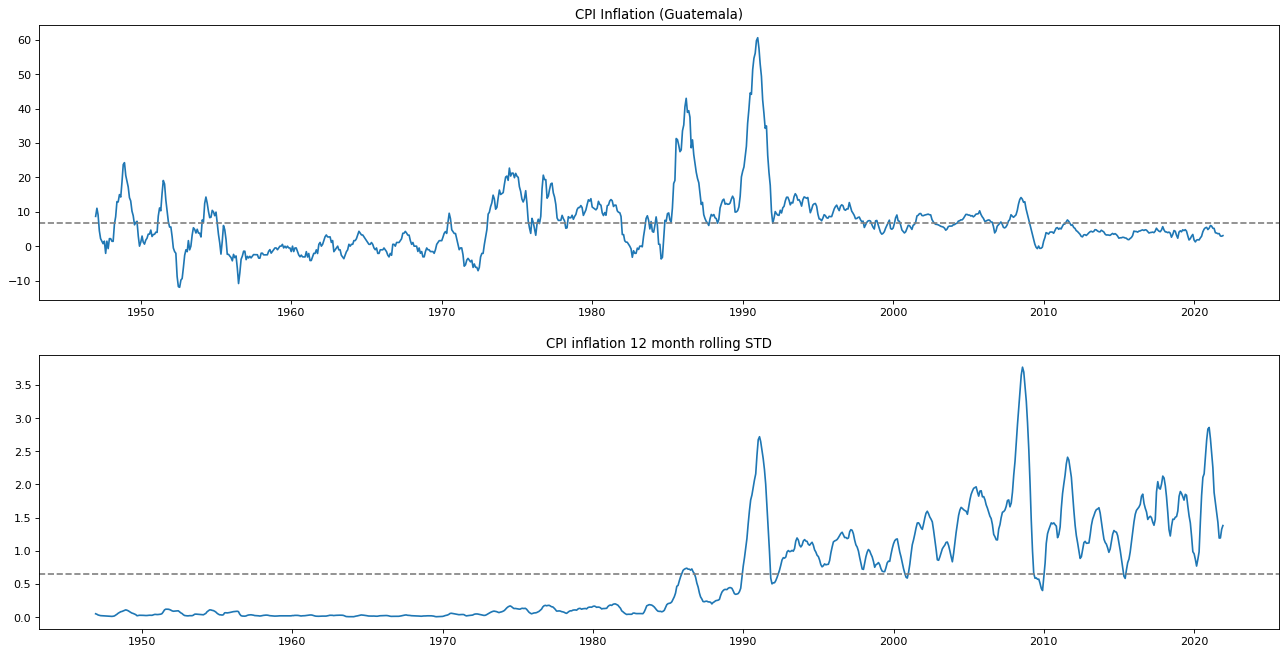

In [14]:
# Ploting the data
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi= 80)

axes[0].plot(inf1['v_cpi'])
axes[0].set_title('CPI Inflation (Guatemala)')
axes[0].axhline(y=np.mean(inf1['v_cpi']), color='grey', linestyle='--')

axes[1].plot(inf1['vol_cpi1'])
axes[1].set_title('CPI inflation 12 month rolling STD')
axes[1].axhline(y=np.mean(inf1['vol_cpi1']), color='grey', linestyle='--')


In [4]:
# Simetric DataFrame Pre IT and Post IT
simdf = inf1.loc['1992-01-01':'2021-12-01']
simdf['desv_tar'] = simdf['v_cpi'] - simdf['target']
simdf['desv_tar_sd'] = simdf['desv_tar'].rolling(12).std()
predf = simdf.loc['1992-01-01':'2004-12-01']
itdf  = simdf.loc['2005-01-01':'2021-12-01']


c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
# Averages 
# Whole period
mean_all = simdf.v_cpi.mean()
vol_all = simdf.vol_cpi1.mean()
vol_desv = simdf.desv_tar_sd.mean()

# Pre IT period
pre_mean = predf.v_cpi.mean()
pre_vol = predf.vol_cpi1.mean()
vol_desv_pre = predf.desv_tar_sd.mean()

# IT period
it_mean = itdf.v_cpi.mean()
it_vol = itdf.vol_cpi1.mean()
vol_desv_it = itdf.desv_tar_sd.mean()

print('1991 - 2021:', mean_all, vol_all, vol_desv)
print('1991 - 2004:', pre_mean, pre_vol, vol_desv_pre)
print('2005 - 2021:', it_mean, it_vol, vol_desv_it)

1991 - 2021: 6.498818873110218 1.352286921666828 1.2075497531492951
1991 - 2004: 8.56282710376714 1.048318550025215 1.2921578603656458
2005 - 2021: 4.92045963790199 1.5847333235104137 1.14741163772591


Differences tests

In [6]:
# Inflation
t_check=stats.ttest_ind(predf.v_cpi.values.tolist(),itdf.v_cpi.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre IT average Inflation is statistically different from IT average Inflation')
    print(t_check[1])

pre IT average Inflation is statistically different from IT average Inflation
2.1417210180767207e-30


In [7]:
# Volatility
t_check=stats.ttest_ind(predf.vol_cpi1.values.tolist(),itdf.vol_cpi1.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre IT Average volatility is statistically different from IT Average volatility')
    print(t_check[1])

pre IT Average volatility is statistically different from IT Average volatility
5.574730062906217e-22


Graphs

In [8]:

x0 = (simdf.index.get_loc('1992-01-01'))/len(simdf.index)
x1 = (simdf.index.get_loc('2004-12-01'))/len(simdf.index)
x2 = (simdf.index.get_loc('2005-01-01'))/len(simdf.index)
x3 = (simdf.index.get_loc('2021-12-01'))/len(simdf.index)

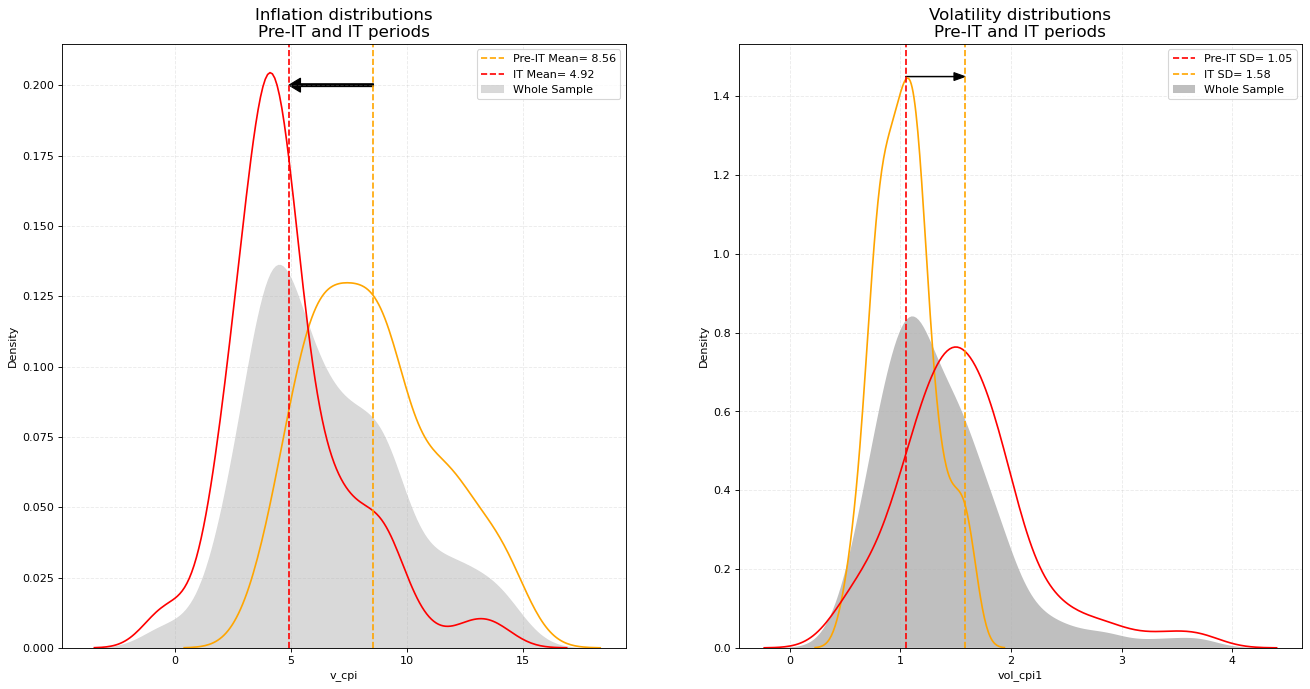

In [9]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(20,10), dpi= 80)

# plt.figure(figsize = (10, 6))
axes[0].set_title('Inflation distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.v_cpi, label='Whole Sample', alpha=0.15, shade=True, color='k', linewidth=0.01, ax=axes[0])
sns.kdeplot(predf.v_cpi, color='orange', ax=axes[0])
sns.kdeplot(itdf.v_cpi, color='r', ax=axes[0])
axes[0].axvline(pre_mean, color = 'orange', linestyle = '--', label='Pre-IT Mean= {:.2f}'.format(pre_mean))
axes[0].axvline(it_mean, color = 'r', linestyle = '--', label='IT Mean= {:.2f}'.format(it_mean))
axes[0].legend()
axes[0].grid(alpha = 0.25, linestyle = '--')
axes[0].arrow(pre_mean, 0.2, it_mean-pre_mean+0.5,0, color='k',head_width=0.005, head_length=0.5)

axes[1].set_title('Volatility distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.vol_cpi1, label='Whole Sample', color='k',linestyle = ':', alpha=0.25, shade=True, linewidth=0.01, ax=axes[1])
sns.kdeplot(predf.vol_cpi1, color='orange', ax=axes[1])
sns.kdeplot(itdf.vol_cpi1, color='r', ax=axes[1])
axes[1].axvline(pre_vol, color = 'r', linestyle = '--', label='Pre-IT SD= {:.2f}'.format(pre_vol))
axes[1].axvline(it_vol, color = 'orange', linestyle = '--', label='IT SD= {:.2f}'.format(it_vol))
axes[1].legend()
axes[1].grid(alpha = 0.25, linestyle = '--')
axes[1].arrow(pre_vol, 1.45, it_vol-pre_vol-0.1,0, color='k',head_width=0.02, head_length=0.1)
plt.show()

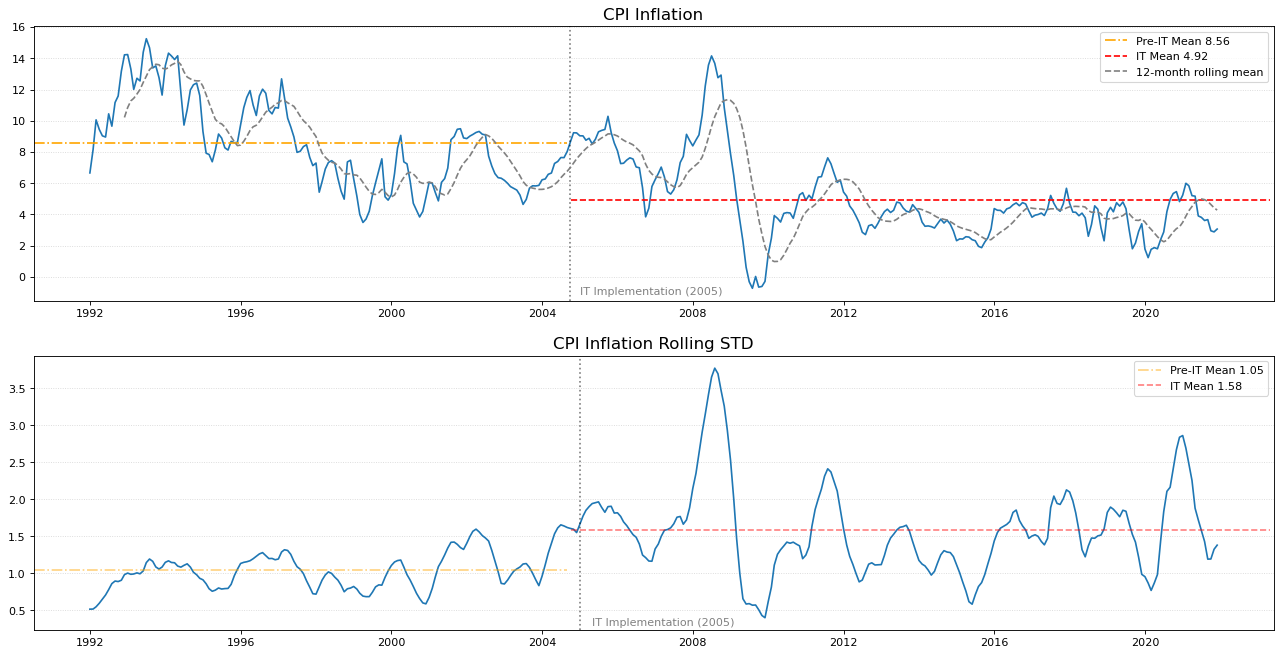

In [13]:
# Time Series plots
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi= 80)

axes[0].set_title('CPI Inflation', fontsize=15)
axes[0].plot(simdf.v_cpi)
axes[0].axhline(xmin=x0, xmax=x1, y=pre_mean, color='orange', linestyle='-.', label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))#
axes[0].axhline(xmin=x2, xmax=x3, y=it_mean, color='r', linestyle='--', label='IT Mean {:.2f}'.format(np.mean(it_mean)))#
axes[0].axvline(pd.to_datetime('2004-10-01'), color='k', linestyle=':', alpha=0.5)
axes[0].plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean', color='grey')
axes[0].text(pd.to_datetime('2005-01-01'),-1.15, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
axes[0].grid(axis='y', linestyle=':', alpha=0.5)
axes[0].legend()

axes[1].set_title('CPI Inflation Rolling STD', fontsize=15)
axes[1].plot(simdf.vol_cpi1)
axes[1].axhline(xmin=x0, xmax=x1, y=pre_vol, color='orange', alpha = 0.5, linestyle='-.', label='Pre-IT Mean {:.2f}'.format(np.mean(pre_vol)))#
axes[1].axhline(xmin=x2, xmax=x3, y=it_vol, color='r', alpha = 0.5, linestyle='--', label='IT Mean {:.2f}'.format(np.mean(it_vol)))#
axes[1].axvline(pd.to_datetime('2005-01-01'), color='k', linestyle=':', alpha=0.5)
axes[1].text(pd.to_datetime('2005-05-01'),0.3, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
axes[1].grid(axis='y', linestyle=':', alpha=0.5)
axes[1].legend()

plt.show()

## Bivariate Distribution

Inflation and output bivariate dist

In [11]:
df2 = df_m[['v_cpi', 'v_cpi_core', 'output']].loc['2005-01-01':'2021-12-01']
df2.head()

NameError: name 'df_m' is not defined

In [ ]:
print(np.mean(df2.v_cpi), np.mean(df2.v_cpi_core), np.mean(df2.output))
print(np.min(df2.v_cpi), np.min(df2.v_cpi_core), np.min(df2.output))
print(np.max(df2.v_cpi), np.max(df2.v_cpi_core), np.max(df2.output))

4.920504917193716 3.870882287049019 3.6035848594942057
-0.732240433349507 0.84 -7.347887775836359
14.155852292778913 9.43 14.033387119278885


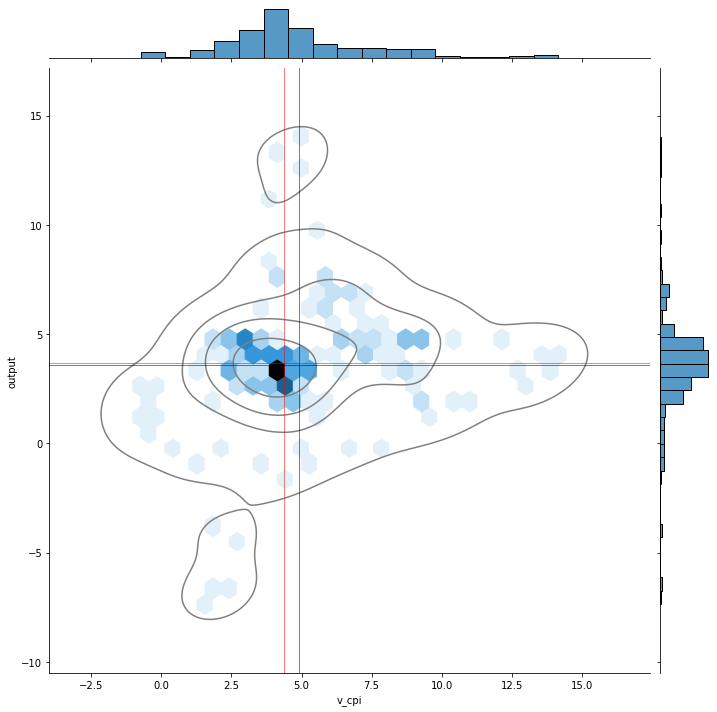

In [ ]:
g = sns.jointplot(data=df2, x="v_cpi", y="output", kind="hex", height=10, ratio=10)
g.plot_joint(sns.kdeplot, color="grey", zorder=1, levels=5)
# plt.figure(figsize=(12,8))
plt.axhline(y=np.mean(df2.output), color="black", lw=1, alpha=0.5)
plt.axvline(np.mean(df2.v_cpi), color="black", lw=1, alpha=0.5)
plt.axhline(y=np.median(df2.output), color="r", lw=1, alpha=0.5)
plt.axvline(np.median(df2.v_cpi), color="r", lw=1, alpha=0.5)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

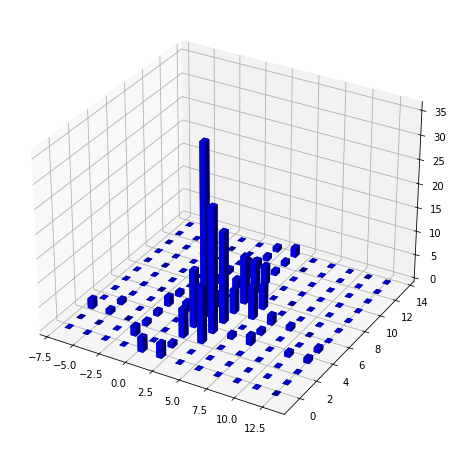

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(df2.v_cpi, df2.output, bins=12, range=[[-1, 14], [-7, 14]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(ypos,xpos, zpos, dx, dy, dz, color='b', zsort='average')
# ax.plot_surface(xpos, ypos, zpos, alpha=0.1)

plt.show()

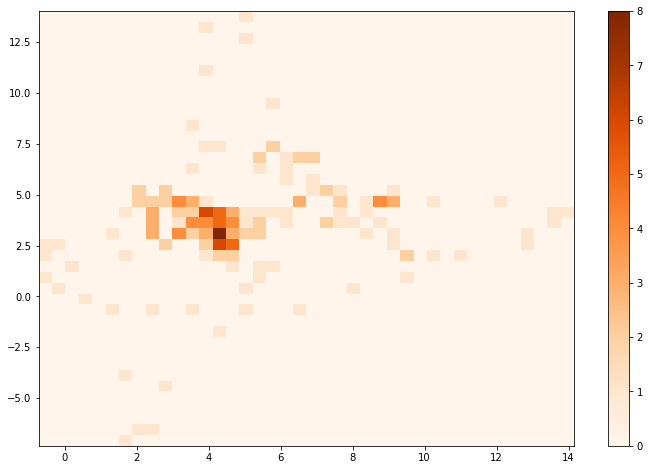

In [ ]:
plt.figure(figsize=(12,8))
h =plt.hist2d(df2.v_cpi, df2.output, bins=(40, 40),cmap=plt.cm.Oranges)#, cmap=plt.cm.jet)
plt.colorbar(h[3])

Bivariate distribution assuming normal distributions (CHECK FOR DISTRIBUTION)

c:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


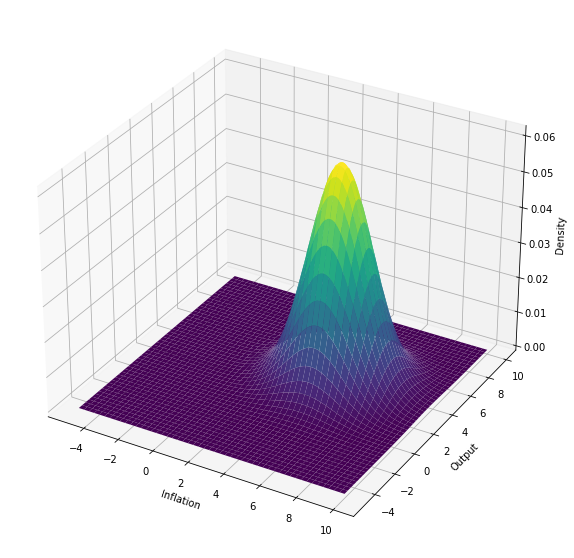

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#df2.v_cpi, df2.output
#Parameters to set
mu_x = np.mean(df2.v_cpi)
variance_x = np.std(df2.v_cpi)

mu_y = np.mean(df2.output)
variance_y = np.std(df2.output)

#Create grid and multivariate normal
x = np.linspace(-5,10,500)
y = np.linspace(-5,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('Inflation')
ax.set_ylabel('Output')
ax.set_zlabel('Density')
plt.show()

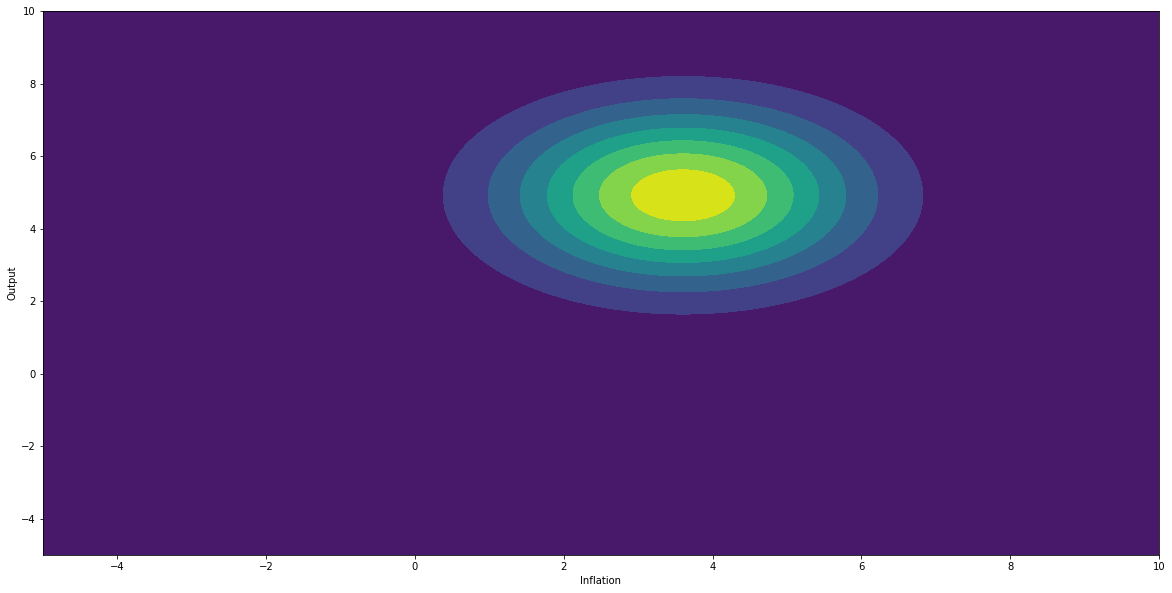

In [ ]:
#Make a 3D plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.contourf(Y, X, rv.pdf(pos),cmap='viridis')#linewidth=0)
ax.set_xlabel('Inflation')
ax.set_ylabel('Output')
# ax.set_zlabel('Density')
plt.show()

## UNUSED

In [ ]:
# plt.figure(figsize=(12,8))
# plt.title('CPI Inflation deviation from Target\n1992-2021', fontsize=15)
# plt.plot(simdf.desv_tar, label='Deviation from target')
# # plt.ylim([-1.5, 25]) 
# # plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
# plt.axhline(xmin=x0, xmax=x1, y=np.mean(predf.desv_tar), color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
# plt.axhline(xmin=x2, xmax=x3, y=np.mean(itdf.desv_tar), color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
# plt.axvline(pd.to_datetime('2005-01-01'), color='k', linestyle=':', alpha=0.5)
# # plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
# plt.text(pd.to_datetime('2005-05-01'),0.25, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
# plt.text(pd.to_datetime('1990-01-01'),vol_desv_pre+0.075, 'Pre-IT Mean {:.2f}'.format(np.mean(predf.desv_tar)), fontsize=10)
# plt.text(pd.to_datetime('2019-06-01'),vol_desv_it+0.075, 'IT Mean {:.2f}'.format(np.mean(itdf.desv_tar)), fontsize=10)
# # plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
# plt.grid(axis='y', linestyle=':', alpha=0.5)
# plt.legend()

# # Test de diferencia de medias std
# from scipy import stats
# t_check=stats.ttest_ind(predf.desv_tar.values.tolist(),itdf.desv_tar.values.tolist())
# t_check
# alpha=0.05
# if(t_check[1]<alpha):
#     print('pre_mean different from it_mean')
#     print(t_check)
# else:
#     print('pre_mean equal to it_mean')
#     print(t_check)

# Test de diferencia de medias std
# from scipy import stats
# t_check=stats.ttest_ind(predf.desv_tar_sd.values.tolist(),itdf.desv_tar_sd.values.tolist())
# t_check
# alpha=0.05
# if(t_check[1]<alpha):
#     print('pre_mean different from it_mean')
#     print(t_check)
# else:
#     print('pre_mean equal to it_mean')
#     print(t_check)

In [ ]:
# # Generate some data:
# from scipy import stats
# # simulation of data gamma distributed
# # data = stats.gamma.rvs(2, loc=1.5, scale=2, size=1000) #sample_df['wage']#

# # Fit various distributions:
# from fitter import Fitter
# f = Fitter(df2.v_cpi)
# f.fit()
# # may take some time since by default, all distributions are tried
# # but you call manually provide a smaller set of distributions
# f.summary()

In [ ]:
# print(f.get_best())
# print(f.fitted_param['dweibull'])

In [ ]:
# g = Fitter(df2.output)
# g.fit()
# # may take some time since by default, all distributions are tried
# # but you call manually provide a smaller set of distributions
# g.summary()

In [ ]:
# print(g.get_best())
# print(g.fitted_param['nct'])

Pending:
- Generate the pdfs of the fitted distributions
- Generate the surface graph with the data

In [ ]:
# from scipy.stats import exponweib
# # import matplotlib.pyplot as plt

# a, c = 1.785, 0.898
# mean, var, skew, kurt = exponweib.stats(a, c, moments='mvsk')

# fig, ax = plt.subplots(1, 1)

# x = np.linspace(exponweib.ppf(0.01, a, c, 4.187, 1.785),
#                 exponweib.ppf(0.99, a, c, 4.187, 1.785), 100)
# ax.plot(x, exponweib.pdf(np.array([df2.v_cpi]), a, c),
#        'r-', lw=5, alpha=0.6, label='exponweib pdf')

In [ ]:
# df_m =  pd.read_csv('data/monthly_data.csv', delimiter=';')
# df_m.index = pd.to_datetime(df_m.month, format='%d/%m/%Y')
# df_m = df_m.drop("month", axis = 1)

# df_m['v_cpi'] = df_m.cpi.pct_change(12)*100
# df_m['vol_cpi1'] = df_m.v_cpi.rolling(12).std()
# df_m['v_cpi_usa'] = df_m.cpi_usa.pct_change(12)*100
# df_m['output'] = df_m.imae_tc.pct_change(12)*100
# df_m['v_ner_gt'] = df_m.ner_gt.pct_change(12)*100
# df_m.tail()

# DataFrame with Pre-Inflation Targetin dates
# pre_df = df_m.loc['1995-01-01':'2004-12-01']
# pre_df.tail()

# DataFrame with Inflation Targetin dates
# it_df = df_m.loc['2005-01-01':'2021-12-01']
# it_df.tail()

# # inflation means
# mean_all = df_m.v_cpi.mean()
# vol_all = df_m.vol_cpi1.mean()
# median_all = df_m.v_cpi.median()
# pre_mean = pre_df.v_cpi.mean()
# pre_vol = pre_df.vol_cpi1.mean()
# it_mean = it_df.v_cpi.mean()
# it_vol = it_df.vol_cpi1.mean()
# print('1995 - 2021:', mean_all, vol_all)
# print('1995 - 2004:', pre_mean, pre_vol)
# print('2005 - 2021:', it_mean, it_vol)

# # pd.to_datetime(df_m.index[20])
# x0 = (df_m.index.get_loc('1996-01-01'))/len(df_m.index)
# x1 = (df_m.index.get_loc('2004-12-01'))/len(df_m.index)
# x2 = (df_m.index.get_loc('2005-01-01'))/len(df_m.index)
# x3 = (df_m.index.get_loc('2021-12-01'))/len(df_m.index)

# plt.figure(figsize=(12,8))
# plt.title('CPI Inflation\n1995-2021', fontsize=15)
# plt.plot(df_m.v_cpi, label='CPI Inflation')
# plt.ylim([-1.5, 14.5]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
# plt.axhline(xmin=x0, xmax=x1, y=pre_mean, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
# plt.axhline(xmin=x2, xmax=x3, y=it_mean, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
# plt.axvline(pd.to_datetime('2005-03-01'), color='k', linestyle=':', alpha=0.5)
# plt.plot(df_m.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
# plt.text(pd.to_datetime('2005-05-01'),-1.4, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
# plt.text(pd.to_datetime('1996-01-01'),pre_mean+0.15, 'Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)), fontsize=10)
# plt.text(pd.to_datetime('2005-03-01'),it_mean-0.3, 'IT Mean {:.2f}'.format(np.mean(it_mean)), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
# plt.grid(axis='y', linestyle=':', alpha=0.5)
# plt.legend()
# plt.show()

# # Bootstrap Means histogram
# plt.figure(figsize = (10, 6))
# plt.suptitle('  ')
# # sns.histplot(boot_means, bins=25, alpha=0.75)
# sns.kdeplot(df_m.v_cpi, label='Whole Sample', color='k',linestyle = ':', shade=True, alpha=0.25)
# sns.kdeplot(pre_df.v_cpi, color='r')
# sns.kdeplot(it_df.v_cpi, color='orange')
# # plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
# plt.axvline(pre_mean, color = 'r', linestyle = '--', label='Pre-IT Mean= {:.5f}'.format(pre_mean))
# plt.axvline(it_mean, color = 'orange', linestyle = '--', label='IT Mean= {:.5f}'.format(it_mean))
# plt.legend()
# plt.grid(alpha = 0.25, linestyle = '--')
# plt.show()

# # Test de diferencia de medias
# from scipy import stats
# t_check=stats.ttest_ind(pre_df.v_cpi[12:].values.tolist(),it_df.v_cpi[12:].values.tolist())
# t_check
# alpha=0.05
# if(t_check[1]<alpha):
#     print('pre IT mean is statistically different from IT mean')
#     print(t_check[1])